# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone project by IBM/Coursera
## Opening New Yoga Studio in Seattle,WA

# Introduction:

Seattle is situated in Pacific Northwest, surrounded by water, mountains and evergreen forests in Washington State. Seattle has population close to 3.4 Million and is home to major Tech Corporations like Microsoft, Amazon and many others. People in the city are health conscious and willing to spend money to take care of their well-being. I visited Seattle multiple times and fell in love with the city and hope to move there one day. I decided to select Seattle for my project to open a new Yoga Studio. 

### Business Problem

The objective of this project is to analyze and identify locations in Seattle that have good potentials to open a new Yoga Studio and its important to choose a location where there is less or no Yoga Studio. Using Data Science Methodology and Machine Learning techniques like clustering we’ll be able to determine that.

### Target Audience

Anybody looking to open a new Yoga Studio is a target audience. Whether single location for individual entrepreneur or multiple locations for big business, it’s a good investment to fulfill health and wellbeing needs of modern, health conscious population. It can also help people to choose what options they have and where the Yoga Studios are located.

# Data:

### Data Required

1. List of Neighborhoods in Seattle, WA. This defines the scope of the project which is confined to city of Seattle,WA.
2. Latitude and the Longitude of the Neighborhoods. This is required to plot the map and get the venues.
3. Venue data, specifically related to Yoga Studio. This data will be used to perform Clustering of the neighborhoods.

### Source and method to extract Data

From Wikipedia ( https://en.wikipedia.org/wiki/Category:Neighborhoods_in_Seattle ) we extract and scrape Seattle Neighborhood data using various Python commands. Next, we get the geographical coordinates, data for the Latitude and the Longitude of the Neighborhoods by using Geocoder library. With list of Neighborhoods and their Latitude and Longitude we use Foursquare API to get venue information and we select the Yoga Studio category for further analysis. We are using K-mean Clustering (Machine Learning Technique) to determine suitable locations for our new business as well as Folium library to locate them in the Map. The processing of data  help us identify which neighborhoods has less concentration of Yoga Studio, therefore indicating suitable location to open a new one.

### Import libraries

In [64]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install geocoder
import geocoder # to get coordinates

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



### Scrap data from Wikipedia page into a DataFrame

In [65]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Seattle',header=0) 
df[0].head(10)

,Unnamed: 0,Neighborhood name,Within larger district,Annexed[41],Locator map,Street map,Image,Notes
0,1,North Seattle,Seattle,Various,NaN,NaN,NaN,North of the Lake Washington Ship Canal[42]
1,2,Broadview,North Seattle[42],1954[43],NaN,NaN,NaN,[44]
2,3,Bitter Lake,North Seattle[42],1954[43],NaN,NaN,NaN,[45]
3,4,North Beach / Blue Ridge,North Seattle[42],"1940,[43] 1954[43]",NaN,NaN,NaN,[46]
4,5,Crown Hill,North Seattle[42],"1907,[47] 1952,[43] 1954[43]",NaN,NaN,NaN,[48]
5,6,Greenwood,North Seattle[42],"1891,[43] 1954[43]",NaN,NaN,NaN,[49]
6,7,Northgate,North Seattle[42],various 1891-1954[43],NaN,NaN,NaN,[50]
7,8,Haller Lake,Northgate[50],1954[43],NaN,NaN,NaN,[51]
8,9,Pinehurst,Northgate[50],1953[43],NaN,NaN,NaN,[52]
9,10,North College Park (Licton Springs),Northgate[50],"1950, 1954[43]",NaN,NaN,NaN,[53]


In [66]:
df1=df[0].drop(['Unnamed: 0','Within larger district','Annexed[41]','Locator map','Street map','Image','Notes'], axis = 1) 
df1.rename (columns = {'Neighborhood name':'Neighborhood'}, inplace = True)
print('Seattle has {} neighborhoods.'.format(df1.shape[0])
     )
df1.head()

Seattle has 127 neighborhoods.


,Neighborhood
0,North Seattle
1,Broadview
2,Bitter Lake
3,North Beach / Blue Ridge
4,Crown Hill


### Get Neighborhood Coordinates using Geocoder Library

In [67]:
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Seattle, WA'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [68]:
coords = [ get_latlng(neighborhood) for neighborhood in df1["Neighborhood"].tolist() ]
coords

[[47.643726891883155, -122.3029390149319],
 [47.722380000000044, -122.36497999999995],
 [47.71868000000006, -122.35029999999995],
 [47.70046000000008, -122.38416999999998],
 [47.69520000000006, -122.37409999999994],
 [47.69082000000003, -122.35528999999997],
 [47.713100000000054, -122.31929999999994],
 [47.72320000000008, -122.33869999999996],
 [47.71894000000003, -122.31399999999996],
 [47.69914000000006, -122.33967999999999],
 [47.699940000000026, -122.31764999999996],
 [47.71780000000007, -122.28317999999996],
 [47.72645000000006, -122.28787999999997],
 [47.69934000000006, -122.27834999999999],
 [47.70841000000007, -122.29582999999997],
 [47.72656000000006, -122.30259999999998],
 [47.710300000000075, -122.30719999999997],
 [47.68701000000004, -122.29493999999994],
 [47.680330000000026, -122.27289999999999],
 [47.682120000000054, -122.26080999999999],
 [47.68156000000005, -122.31694999999996],
 [47.67393000000004, -122.29913999999997],
 [47.67579000000006, -122.28733999999997],
 [47.

In [69]:
# create temporary dataframe to populate the coordinates into Latitude and Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
# merge the coordinates into the original dataframe
df1['Latitude'] = df_coords['Latitude']
df1['Longitude'] = df_coords['Longitude']
# check the neighborhoods and the coordinates
print(df1.shape)     
df1.head()

(127, 3)


,Neighborhood,Latitude,Longitude
0,North Seattle,47.643727,-122.302939
1,Broadview,47.722380,-122.364980
2,Bitter Lake,47.718680,-122.350300
3,North Beach / Blue Ridge,47.700460,-122.384170
4,Crown Hill,47.695200,-122.374100


In [70]:
# save the DataFrame as CSV file
df1.to_csv("df1.csv", index=False)

### Create a map of Seattle with neighborhoods superimposed on top

In [71]:
# get the coordinates of Seattle
address = 'Seattle, WA'  
geolocator = Nominatim(user_agent="Seattle_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Seatte are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Seatte are 47.6038321, -122.3300624.


In [72]:
# create map of Seattle using latitude and longitude values
map_seattle = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df1['Latitude'], df1['Longitude'], df1['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_seattle)  
    
map_seattle

### Use the Foursquare API to explore the neighborhoods

In [73]:
CLIENT_ID = 'J4XAOT1GHDQ0RAS4LQ4553XVU24X14DQPYMWKPR3ILDBN43O' # your Foursquare ID
CLIENT_SECRET = 'V0I4TJRPTA3K0V1NQFCGLP52UQXEWOA5S0XXN1TSSSX53IZP' # your Four square Secret
VERSION = '20180605' # Foursquare API version 
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)      

Your credentails:
CLIENT_ID: J4XAOT1GHDQ0RAS4LQ4553XVU24X14DQPYMWKPR3ILDBN43O
CLIENT_SECRET:V0I4TJRPTA3K0V1NQFCGLP52UQXEWOA5S0XXN1TSSSX53IZP


## Methodology
### Now, let's get the top 100 venues within a radius of 1500 meters.

In [74]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1500 # define radius 

venues = []

for lat, long, neighborhood in zip(df1['Latitude'], df1['Longitude'], df1['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [75]:
# convert the venues list into a new DataFrame
df_venues = pd.DataFrame(venues)

# define the column names
df_venues.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(df_venues.shape)
df_venues.head()

(9907, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,North Seattle,47.643727,-122.302939,Washington Park Arboretum,47.639740,-122.294721,Botanical Garden
1,North Seattle,47.643727,-122.302939,Seattle Public Library - Montlake,47.640520,-122.302413,Library
2,North Seattle,47.643727,-122.302939,Cafe Lago,47.639698,-122.302256,Italian Restaurant
3,North Seattle,47.643727,-122.302939,Montlake Cut,47.647094,-122.304686,Canal
4,North Seattle,47.643727,-122.302939,Arboretum Waterfront Trail,47.642934,-122.291802,Trail


### Let's check how many venues were returned for each neighorhood

In [76]:
df_venues.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Adams,100,100,100,100,100,100
Alki Point,79,79,79,79,79,79
Arbor Heights,12,12,12,12,12,12
Atlantic,100,100,100,100,100,100
Ballard,100,100,100,100,100,100
...,...,...,...,...,...,...
West Woodland,100,100,100,100,100,100
Westlake,100,100,100,100,100,100
Whittier Heights,100,100,100,100,100,100


### Let's find out how many unique categories from all the returned venues

In [77]:
print('There are {} unique categories.'.format(len(df_venues['VenueCategory'].unique())))

There are 376 unique categories.


In [78]:
# print out the list of categories
df_venues['VenueCategory'].unique()[:50]

array(['Botanical Garden', 'Library', 'Italian Restaurant', 'Canal',
       'Trail', 'Park', 'Coffee Shop', 'Deli / Bodega', 'Bike Shop',
       'Scenic Lookout', 'Gym', 'Fountain', 'Student Center',
       'Golf Course', 'Mexican Restaurant', 'College Theater',
       'Pizza Place', 'Garden', 'Bar', 'Grocery Store',
       'Ethiopian Restaurant', 'College Baseball Diamond',
       'Tourist Information Center', 'American Restaurant', 'Playground',
       'Steakhouse', "Doctor's Office", 'Sandwich Place', 'Food Truck',
       'Bus Line', 'Bus Stop', 'College Cafeteria', 'Boat or Ferry',
       'Lake', 'Harbor / Marina', 'Football Stadium', 'Track',
       'Bus Station', 'Tree', 'Watch Shop', 'BBQ Joint',
       'Sculpture Garden', 'Baseball Field', 'Memorial Site',
       'Thai Restaurant', 'Szechuan Restaurant', 'Dumpling Restaurant',
       'Beer Bar', 'Asian Restaurant', 'Fast Food Restaurant'],
      dtype=object)

In [79]:
# check if the results contain "Yoga Studio"
"Yoga Studio" in df_venues['VenueCategory'].unique()

True

### Analyze Each Neighborhood

In [80]:
# one hot encoding
Seattle_onehot = pd.get_dummies(df_venues[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Seattle_onehot['Neighborhoods'] = df_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Seattle_onehot.columns[-1]] + list(Seattle_onehot.columns[:-1])
Seattle_onehot = Seattle_onehot[fixed_columns]

print(Seattle_onehot.shape)
Seattle_onehot.head()

(9907, 377)


,Neighborhoods,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,North Seattle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [81]:
Seattle_grouped = Seattle_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(Seattle_grouped.shape)
Seattle_grouped

(127, 377)


,Neighborhoods,ATM,Accessories Store,Adult Boutique,Advertising Agency,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Adams,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.01,0.00,0.00
1,Alki Point,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.012658,0.0,0.00,0.00,0.0,0.00,0.00,0.00
2,Arbor Heights,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.00,0.00,0.00
3,Atlantic,0.0,0.0,0.0,0.0,0.01,0.00,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.00,0.00,0.00
4,Ballard,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.010000,0.0,0.00,0.00,0.0,0.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,West Woodland,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.010000,0.0,0.01,0.00,0.0,0.01,0.01,0.05
123,Westlake,0.0,0.0,0.0,0.0,0.00,0.01,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.01,0.00,0.00
124,Whittier Heights,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00,0.01,0.0,0.00,0.00,0.00
125,Windermere,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.00,0.00,0.00


In [82]:
len(Seattle_grouped[Seattle_grouped["Yoga Studio"] > 0])

49

### Create a new DataFrame for Yoga Studio data only

In [95]:
Seattle_Yoga = Seattle_grouped[["Neighborhoods","Yoga Studio"]]
Seattle_Yoga.head()

,Neighborhoods,Yoga Studio
0,Adams,0.01
1,Alki Point,0.00
2,Arbor Heights,0.00
3,Atlantic,0.00
4,Ballard,0.01


### Determine optimal K for K-means Algorithm

In [98]:
Seattle_opt = Seattle_Yoga.drop(["Neighborhoods"], 1)
Sum_of_squared_distances = []

K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Seattle_opt)
    Sum_of_squared_distances.append(km.inertia_)

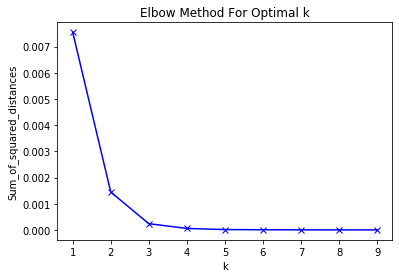

In [99]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Cluster Neighborhoods

In [54]:
# set number of clusters
kclusters = 3

Seattle_clustering = Seattle_Yoga.drop(["Neighborhoods"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Seattle_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 0, 0, 1, 0, 2, 0, 0, 0])

In [55]:
# create a new dataframe that includes the cluster for each neighborhood.
Seattle_merged = Seattle_Yoga.copy()

# add clustering labels
Seattle_merged["Cluster Labels"] = kmeans.labels_
Seattle_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
Seattle_merged.head()

,Neighborhood,Yoga Studio,Cluster Labels
0,Adams,0.01,1
1,Alki Point,0.00,0
2,Arbor Heights,0.00,0
3,Atlantic,0.00,0
4,Ballard,0.01,1


In [56]:
# merge to add latitude/longitude for each neighborhood
Seattle_merged = Seattle_merged.join(df1.set_index("Neighborhood"), on="Neighborhood")

print(Seattle_merged.shape)
Seattle_merged.head() # check the last columns!

(127, 5)


,Neighborhood,Yoga Studio,Cluster Labels,Latitude,Longitude
0,Adams,0.01,1,47.672970,-122.387600
1,Alki Point,0.00,0,47.582391,-122.373317
2,Arbor Heights,0.00,0,47.508610,-122.375930
3,Atlantic,0.00,0,47.596010,-122.302230
4,Ballard,0.01,1,47.668670,-122.384530


### Finally, let's visualize the resulting clusters

In [57]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Seattle_merged['Latitude'], Seattle_merged['Longitude'], Seattle_merged['Neighborhood'], Seattle_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results
### Cluster 0

In [58]:
Seattle_merged.loc[Seattle_merged['Cluster Labels'] == 0]

,Neighborhood,Yoga Studio,Cluster Labels,Latitude,Longitude
1,Alki Point,0.0,0,47.582391,-122.373317
2,Arbor Heights,0.0,0,47.508610,-122.375930
3,Atlantic,0.0,0,47.596010,-122.302230
5,Beacon Hill,0.0,0,47.576860,-122.312710
7,Bitter Lake,0.0,0,47.718680,-122.350300
...,...,...,...,...,...
113,University Village,0.0,0,47.664280,-122.298530
117,Washington Park,0.0,0,47.628100,-122.288240
119,West Edge[118][119],0.0,0,47.619310,-122.358445
124,Whittier Heights,0.0,0,47.684510,-122.371440


### Cluster 1

In [59]:
Seattle_merged.loc[Seattle_merged['Cluster Labels'] == 1]

,Neighborhood,Yoga Studio,Cluster Labels,Latitude,Longitude
0,Adams,0.010000,1,47.672970,-122.387600
4,Ballard,0.010000,1,47.668670,-122.384530
17,"Central Area[120] / Central District (""CD"")",0.010000,1,47.605530,-122.334320
18,Central Business District,0.010000,1,47.605530,-122.334320
28,East Queen Anne,0.010000,1,47.638240,-122.350220
30,Fairmount Park,0.010000,1,47.553410,-122.381600
32,First Hill,0.010000,1,47.608780,-122.326430
48,Interbay,0.010000,1,47.653990,-122.379690
52,Junction[154] / West Seattle Junction / Alaska...,0.010000,1,47.571230,-122.385140
66,Mann,0.010000,1,47.612950,-122.299560


### Cluster 2

In [60]:
Seattle_merged.loc[Seattle_merged['Cluster Labels'] == 2]

,Neighborhood,Yoga Studio,Cluster Labels,Latitude,Longitude
6,Belltown,0.020000,2,47.615760,-122.344640
12,Broadway,0.020000,2,47.624960,-122.320920
14,Capitol Hill,0.020000,2,47.623960,-122.318820
19,Central Seattle,0.020000,2,47.667038,-122.380468
29,Eastlake,0.034091,2,47.647080,-122.324770
37,Green Lake,0.022222,2,47.685080,-122.332320
54,Lake Union,0.020000,2,47.618530,-122.343290
62,Madison Valley,0.020000,2,47.607459,-122.329708
79,North Queen Anne,0.020000,2,47.645860,-122.368400
82,Northlake,0.020000,2,47.655038,-122.320812


## Conclusion

Examining all clusters, it looks like neighborhoods in cluster 2 has the most number of Yoga studio followed by neighborhoods in cluster 1. Neighborhoods in cluster 0 has low number to no Yoga Studio. This represents a great opportunity to open new Yoga Studio in neighborhoods located in cluster 0 as there is very little to no competition. 